In [2]:
import scanpy as sc
import pandas as pd

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.2.0
anyio                       NA
arrow                       1.2.3
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.7
brotli                      1.0.9
certifi                     2024.02.02
cffi                        1.16.0
chardet                     4.0.0
charset_normalizer          2.0.4
cloudpickle                 2.2.1
colorama                    0.4.6
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.2
dask                        2023.11.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fastjsonschema              NA


In [3]:
# read the data
normal_1 = sc.read("../normalized/normal_1_normalized.h5ad")
normal_2 = sc.read("../normalized/normal_2_normalized.h5ad")
normal_3 = sc.read("../normalized/normal_3_normalized.h5ad")
hiv_1 = sc.read("../normalized/hiv_1_normalized.h5ad")
hiv_2 = sc.read("../normalized/hiv_2_normalized.h5ad")
hiv_3 = sc.read("../normalized/hiv_3_normalized.h5ad")

In [5]:
# concatenate the data
adata_concat = normal_1.concatenate(normal_2, normal_3, hiv_1, hiv_2, hiv_3, batch_categories = ["normal_1", "normal_2", "normal_3", "hiv_1", "hiv_2", "hiv_3"])

C:\Users\heung\AppData\Local\Temp\ipykernel_61288\3593418488.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = normal_1.concatenate(normal_2, normal_3, hiv_1, hiv_2, hiv_3, batch_categories = ["normal_1", "normal_2", "normal_3", "hiv_1", "hiv_2", "hiv_3"])


In [6]:
# perform PCA
sc.tl.pca(adata_concat)

In [7]:
adata_concat.obs

n_genes  n_genes_by_counts  \
AAACCTGAGAAACCGC-1-normal_1     1839               1838   
AAACCTGAGGACCACA-1-normal_1     1980               1978   
AAACCTGAGGATCGCA-1-normal_1     3024               3024   
AAACCTGAGGCACATG-1-normal_1     1764               1764   
AAACCTGAGGTGCACA-1-normal_1     2055               2055   
...                              ...                ...   
TTTGTCATCATGCTCC-1-hiv_3        1255               1255   
TTTGTCATCCAAATGC-1-hiv_3        1960               1959   
TTTGTCATCCAGGGCT-1-hiv_3        1115               1114   
TTTGTCATCGTACGGC-1-hiv_3        1321               1321   
TTTGTCATCTTAGCCC-1-hiv_3        1249               1248   

                             log1p_n_genes_by_counts  total_counts  \
AAACCTGAGAAACCGC-1-normal_1                 7.516977        6291.0   
AAACCTGAGGACCACA-1-normal_1                 7.590347        6907.0   
AAACCTGAGGATCGCA-1-normal_1                 8.014666        9196.0   
AAACCTGAGGCACATG-1-normal_1                 7.475906        6365.0   
AAACCTGAGGTGCACA-1-normal_1                 7.628518        6529.0   
...                                              ...           ...   
TTTGTCATCATGCTCC-1-hiv_3                    7.135687        2367.0   
TTTGTCATCCAAATGC-1-hiv_3                    7.580700        4776.0   
TTTGTCATCCAGGGCT-1-hiv_3                    7.016610        2084.0   
TTTGTCATCGTACGGC-1-hiv_3                    7.186901        2621.0   
TTTGTCATCTTAGCCC-1-hiv_3                    7.130099        2898.0   

                             log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGAAACCGC-1-normal_1            8.747034                   24.765538   
AAACCTGAGGACCACA-1-normal_1            8.840435                   25.727523   
AAACCTGAGGATCGCA-1-normal_1            9.126633                   16.746411   
AAACCTGAGGCACATG-1-normal_1            8.758727                   27.541241   
AAACCTGAGGTGCACA-1-normal_1            8.784163                   22.346454   
...                                         ...                         ...   
TTTGTCATCATGCTCC-1-hiv_3               7.769801                   21.419518   
TTTGTCATCCAAATGC-1-hiv_3               8.471568                   16.729481   
TTTGTCATCCAGGGCT-1-hiv_3               7.642524                   22.120921   
TTTGTCATCGTACGGC-1-hiv_3               7.871693                   19.954216   
TTTGTCATCTTAGCCC-1-hiv_3               7.972121                   20.082816   

                             total_counts_MT  log1p_total_counts_MT  \
AAACCTGAGAAACCGC-1-normal_1            117.0               4.770685   
AAACCTGAGGACCACA-1-normal_1            186.0               5.231109   
AAACCTGAGGATCGCA-1-normal_1            362.0               5.894403   
AAACCTGAGGCACATG-1-normal_1             96.0               4.574711   
AAACCTGAGGTGCACA-1-normal_1            211.0               5.356586   
...                                      ...                    ...   
TTTGTCATCATGCTCC-1-hiv_3                53.0               3.988984   
TTTGTCATCCAAATGC-1-hiv_3               144.0               4.976734   
TTTGTCATCCAGGGCT-1-hiv_3                46.0               3.850147   
TTTGTCATCGTACGGC-1-hiv_3                75.0               4.330733   
TTTGTCATCTTAGCCC-1-hiv_3                69.0               4.248495   

                             pct_counts_MT  total_counts_ribo  \
AAACCTGAGAAACCGC-1-normal_1       1.859800             2799.0   
AAACCTGAGGACCACA-1-normal_1       2.692920             3114.0   
AAACCTGAGGATCGCA-1-normal_1       3.936494             1643.0   
AAACCTGAGGCACATG-1-normal_1       1.508248             2874.0   
AAACCTGAGGTGCACA-1-normal_1       3.231735             2472.0   
...                                    ...                ...   
TTTGTCATCATGCTCC-1-hiv_3          2.239121              405.0   
TTTGTCATCCAAATGC-1-hiv_3          3.015075              840.0   
TTTGTCATCCAGGGCT-1-hiv_3          2.207294              325.0   
TTTGTCATCGTACGGC-1-hiv_3   

In [8]:
sc.pp.pca(adata_concat)
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)

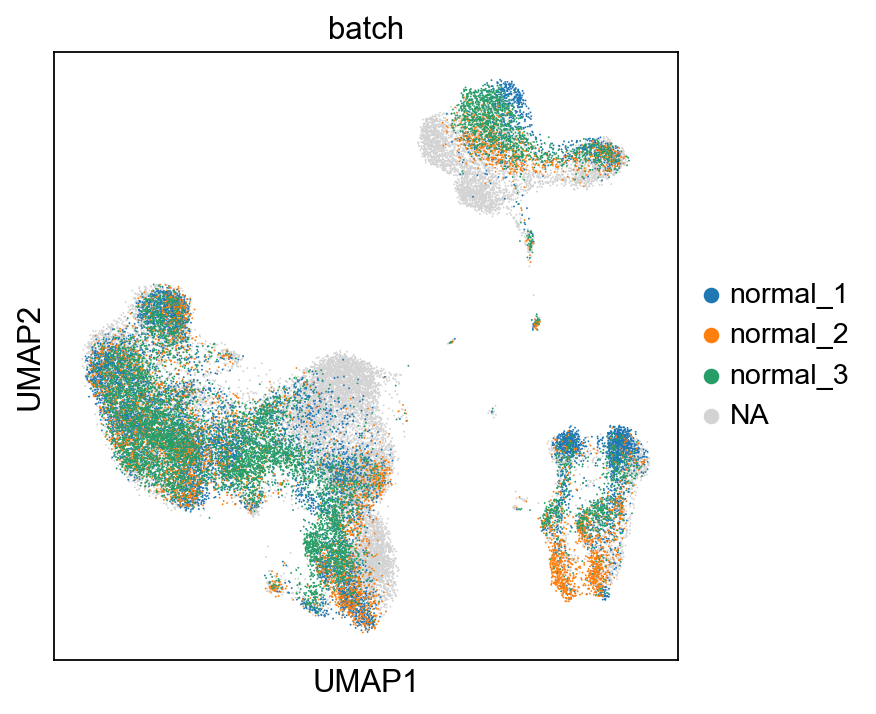

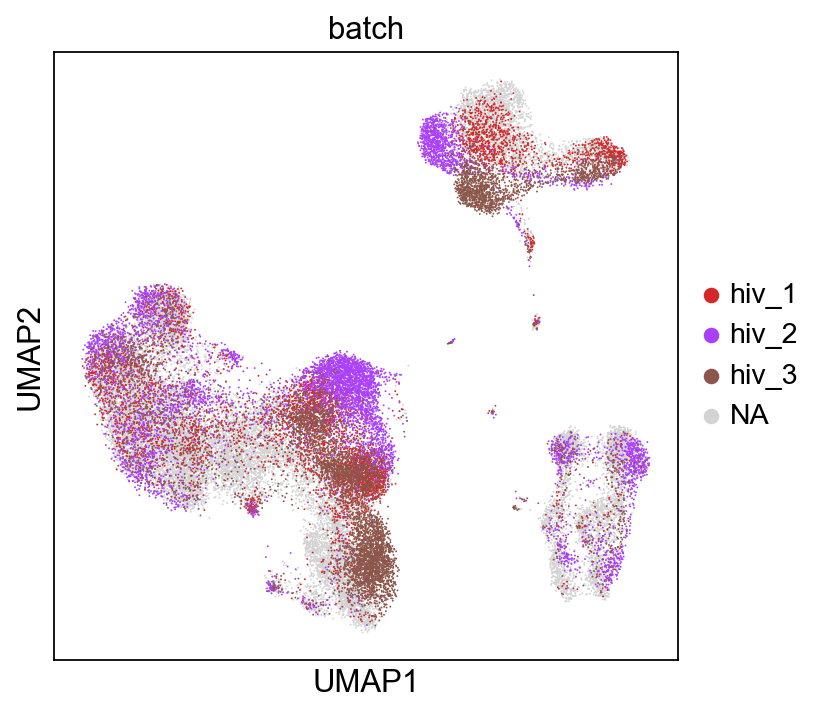

In [9]:
sc.settings.set_figure_params(dpi=80, frameon=True, figsize=(5, 5), facecolor="white")
sc.pl.umap(
    adata_concat,
    color=["batch"],
    palette = sc.pl.palettes.vega_20_scanpy,
    groups = ["normal_1", "normal_2", "normal_3"]
    
)
sc.pl.umap(
    adata_concat,
    color=["batch"],
    palette = sc.pl.palettes.vega_20_scanpy,
    groups = ["hiv_1", "hiv_2", "hiv_3"]
    
)



In [10]:
# batch correction

sc.external.pp.bbknn(adata_concat, batch_key = "batch")

In [11]:
sc.tl.umap(adata_concat)

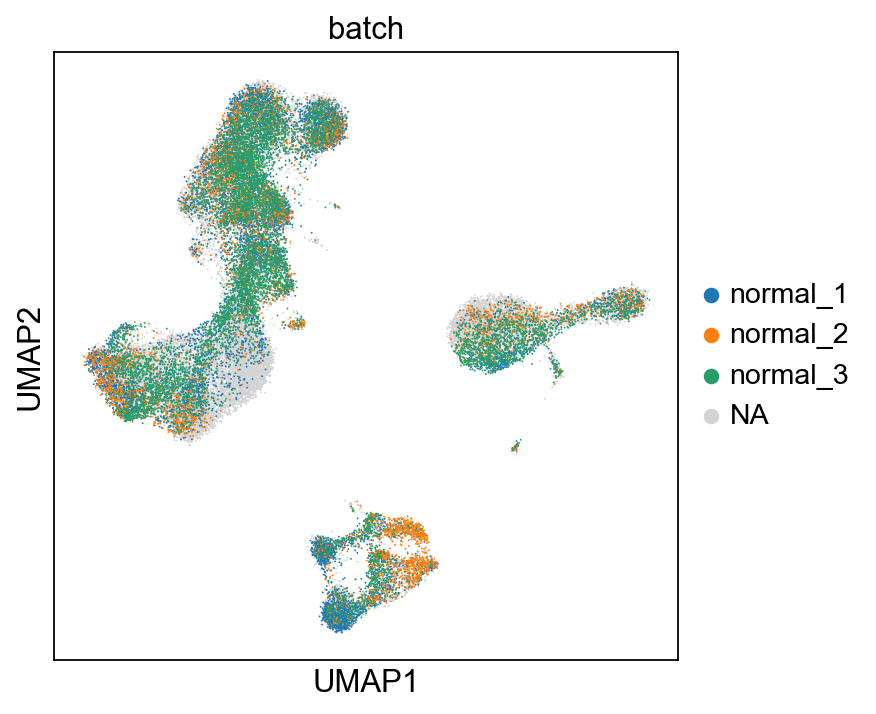

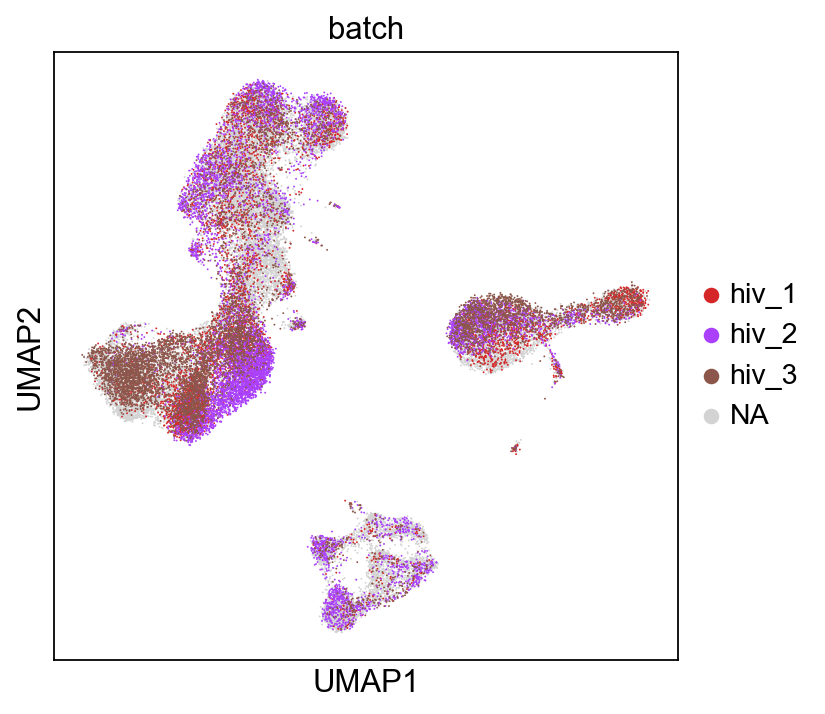

In [12]:
sc.pl.umap(
    adata_concat,
    color = ["batch"],
    palette = sc.pl.palettes.vega_20_scanpy,
    groups = ["normal_1", "normal_2", "normal_3"]
    )
sc.pl.umap(
    adata_concat,
    color = ["batch"],
    palette = sc.pl.palettes.vega_20_scanpy,
    groups = ["hiv_1", "hiv_2", "hiv_3"]
    )

# clustering

In [13]:
# clustering
# sc.tl.leiden(adata_concat, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata_concat, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata_concat, key_added="leiden_res1", resolution=1.0)
sc.tl.leiden(adata_concat, key_added="leiden_res2", resolution=2.0)


C:\Users\heung\AppData\Local\Temp\ipykernel_61288\1097942466.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_concat, key_added="leiden_res0_5", resolution=0.5)


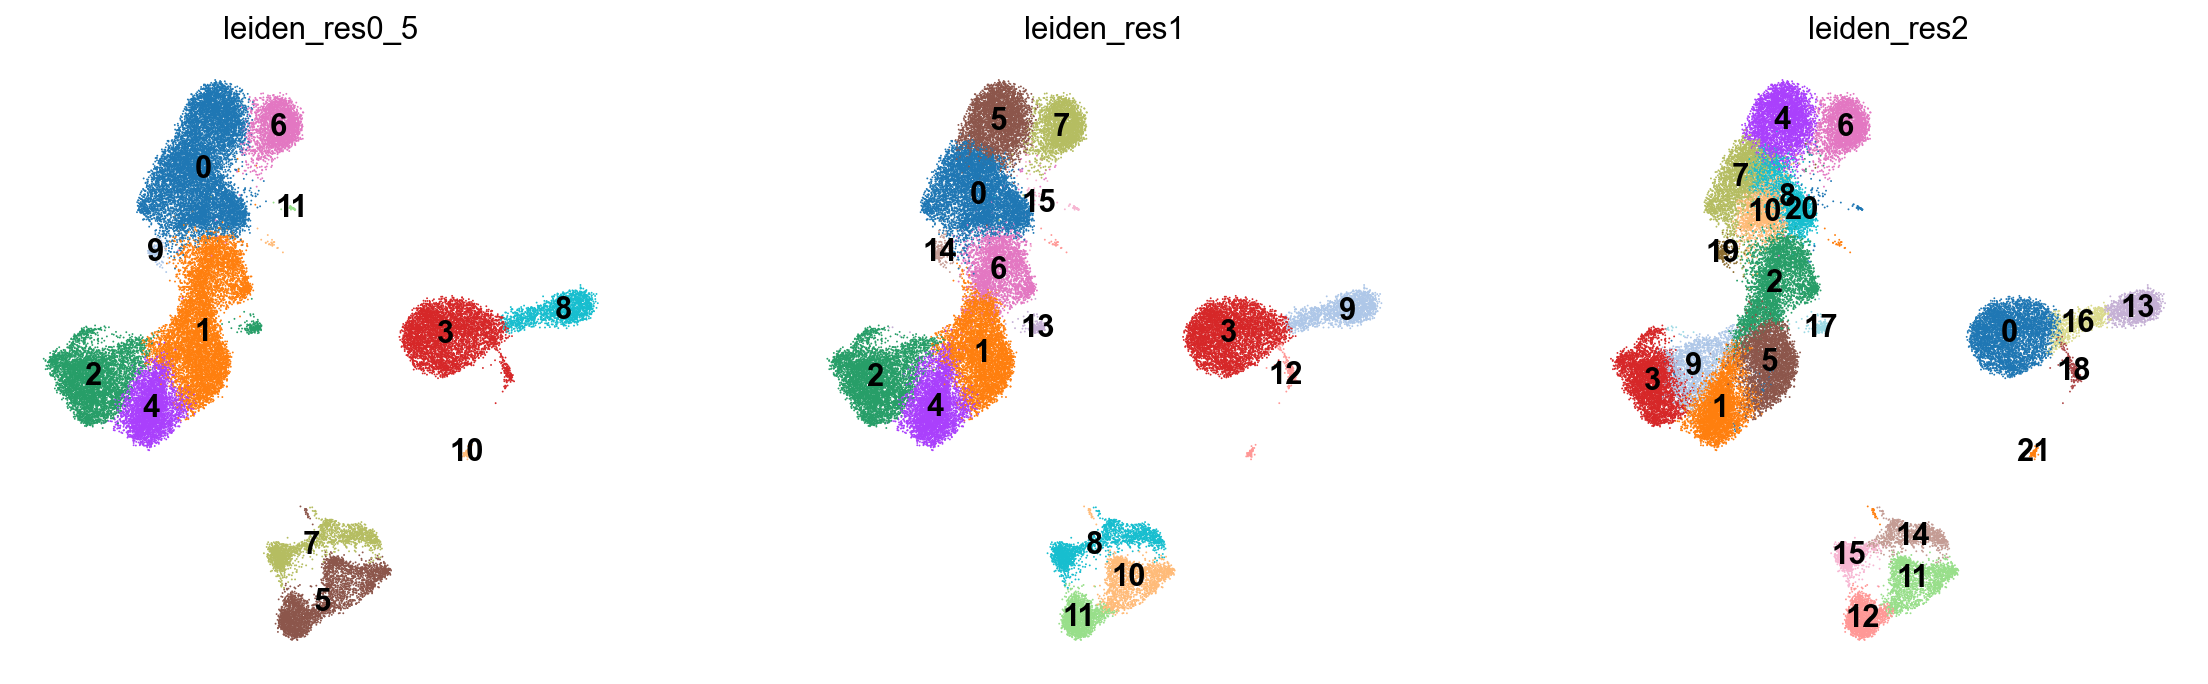

In [14]:
# plot the clusters
sc.pl.umap(
    adata_concat,
    color=["leiden_res0_5", "leiden_res1", "leiden_res2"],
    legend_loc="on data",
    palette = sc.pl.palettes.vega_20_scanpy,
    frameon = False
)

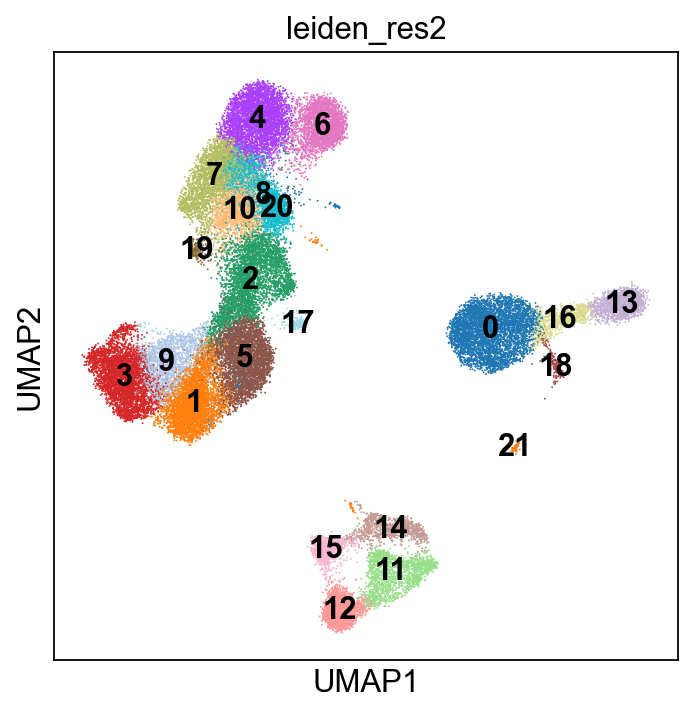

In [15]:
sc.pl.umap(
    adata_concat,
    color=["leiden_res2"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy
)

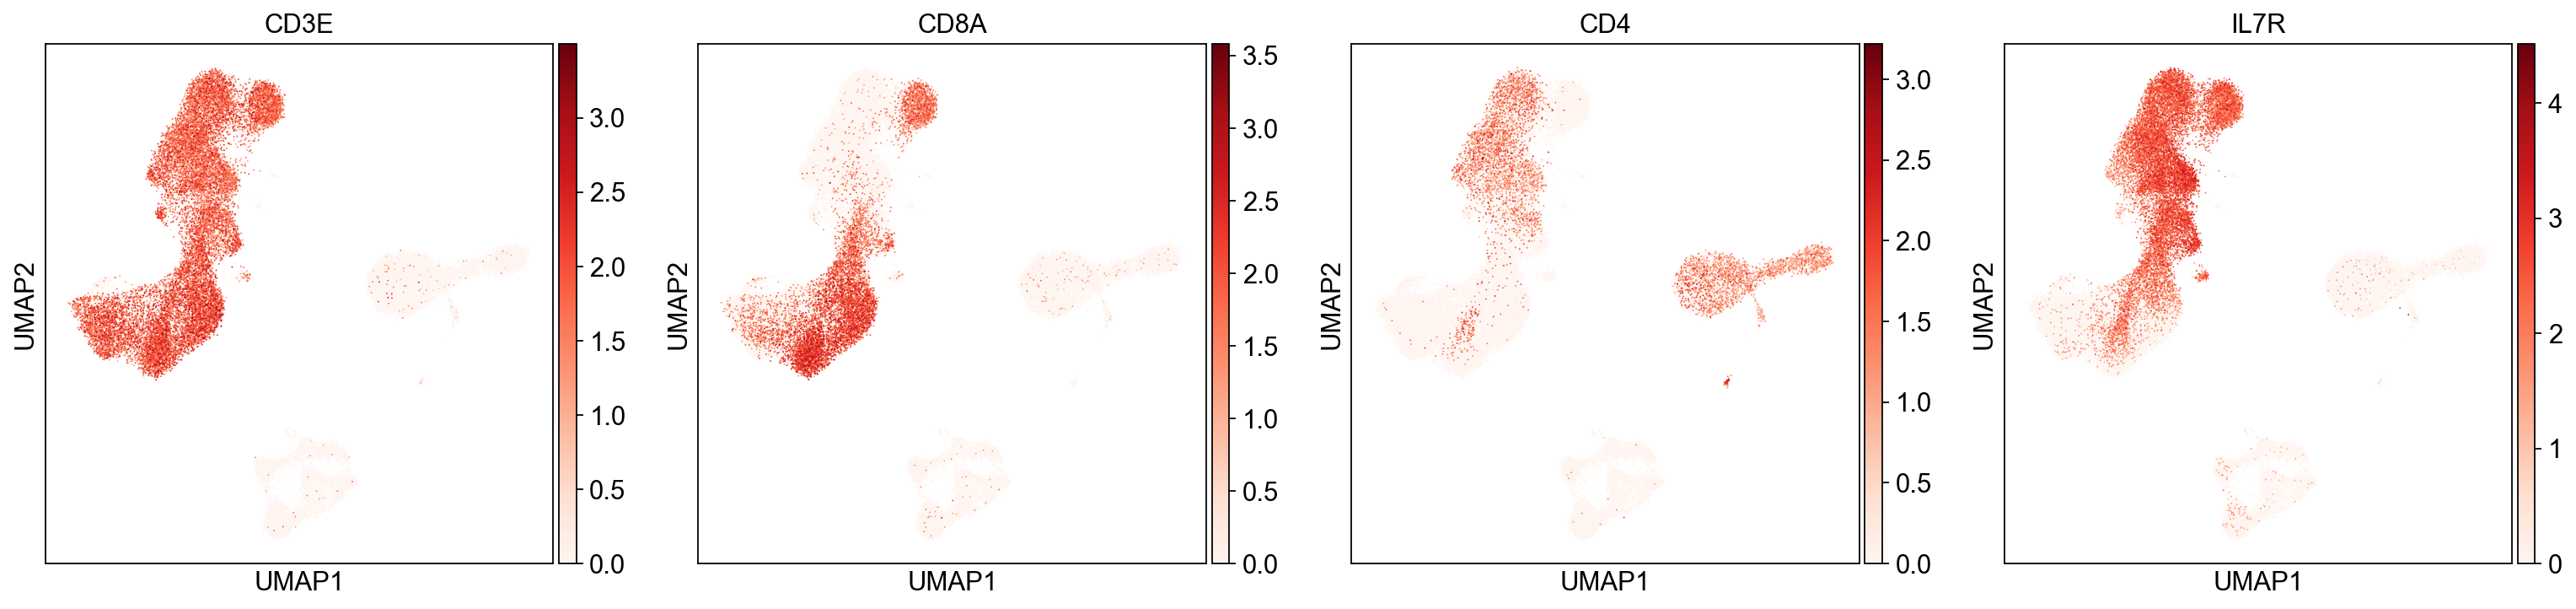

In [26]:
sc.pl.umap(
    adata_concat,
    color=["CD3E", "CD8A", "CD4", "IL7R"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy,
    cmap = "Reds"
)

In [ ]:
sc.pl.umap(
    adata_concat,
    color=["leiden_res2", "LYZ", "CD14", "VCAN", "FCGR3A", "CD1C"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy
)

In [ ]:
sc.pl.umap(
    adata_concat,
    color=["leiden_res2", "CD79A", "MS4A1", "CD27", "CD19", "MZB1", "TCL1A"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy
)

In [ ]:
sc.pl.umap(
    adata_concat,
    color=["leiden_res2", "S100B", "TUBB", "STMN1", "TRGV9", "GNLY"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy
)

In [ ]:
sc.pl.umap(
    adata_concat,
    color=["leiden_res2"],
    legend_loc = "on data",
    # legend_fontsize = 12
    palette = sc.pl.palettes.vega_20_scanpy
)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

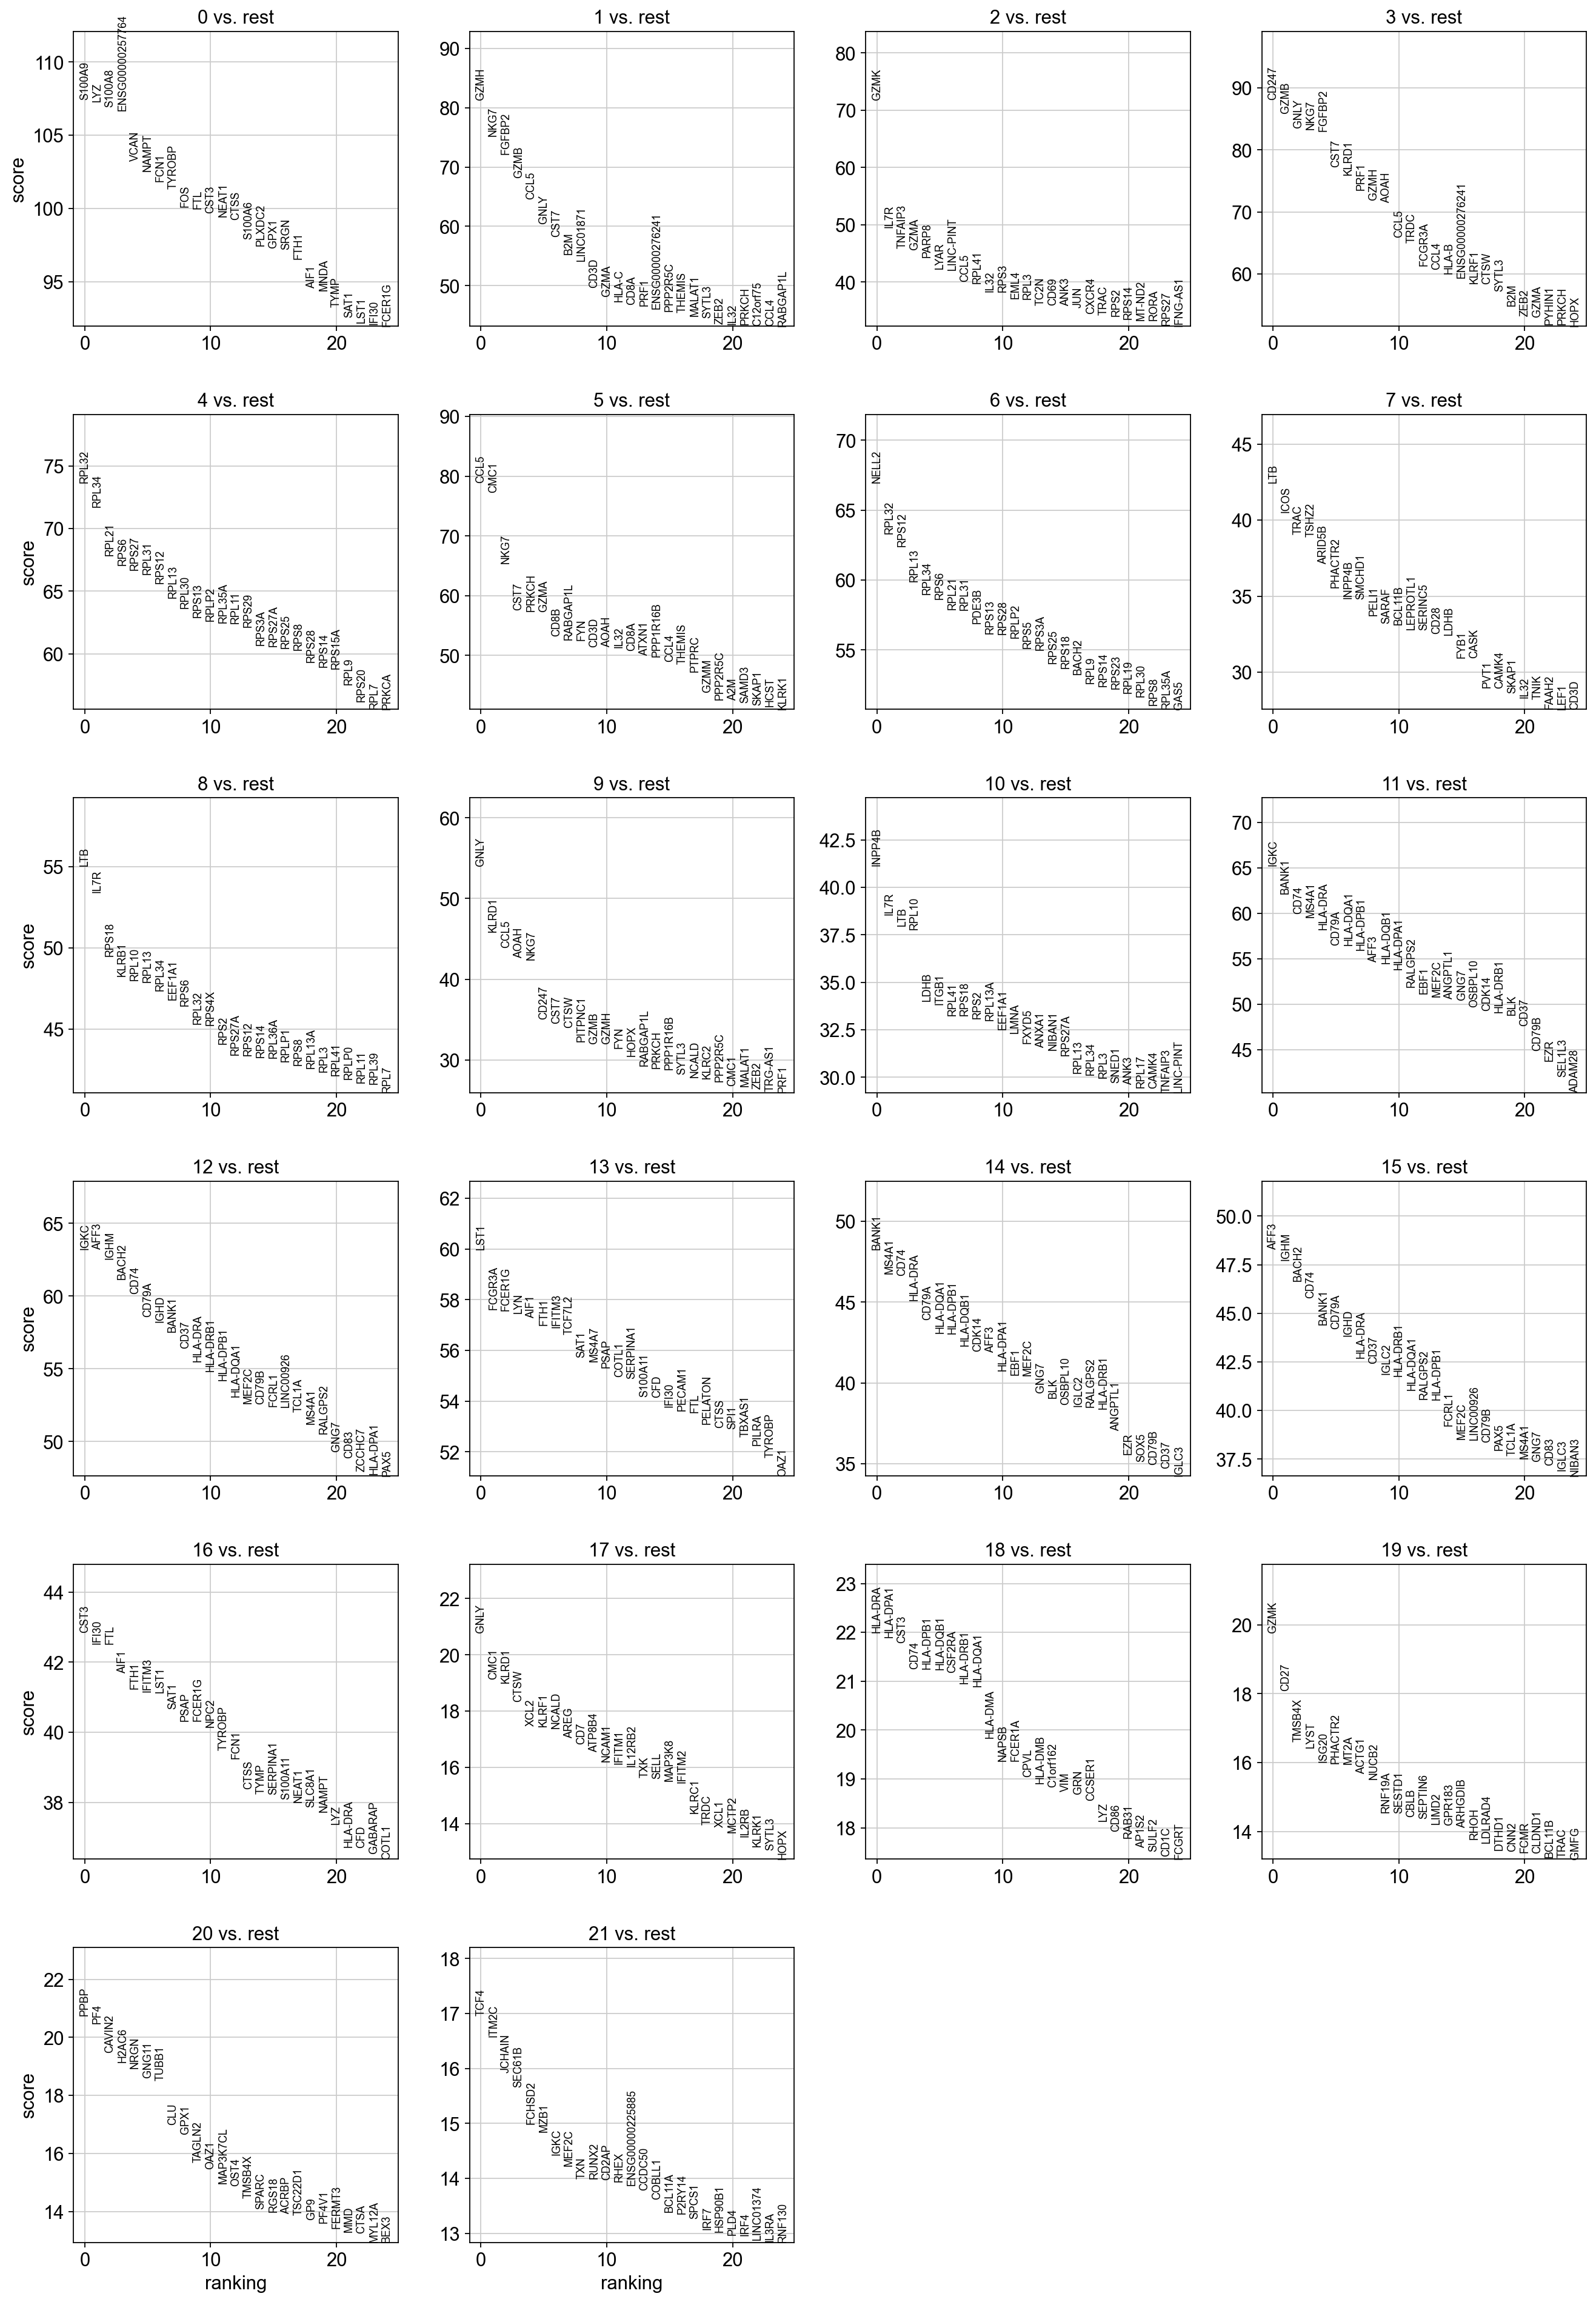

In [16]:
# finding marker genes
sc.tl.rank_genes_groups(adata_concat, "leiden_res2", method = "wilcoxon")
sc.pl.rank_genes_groups(adata_concat, n_genes = 25, sharey = False)

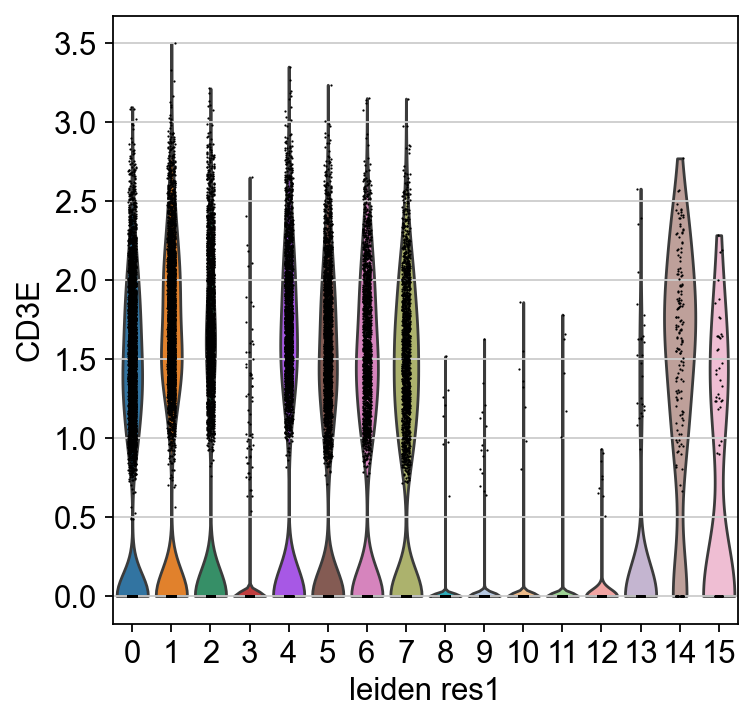

In [17]:
sc.pl.violin(adata_concat, ["CD3E"], groupby = "leiden_res1")

In [ ]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
}

In [ ]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata_concat.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [ ]:
sc.pl.umap(
    adata_concat,
    color = ["leiden_res2","NRIP1", "MECOM", "PROM1", "NKAIN2"],
    vmin = 0,
    vmax = "p99",
    sort_order = False,
    frameon = False,
    cmap = "Reds",
    legend_loc = "on data",
    
)

In [16]:
# cell type annotation
annotation_dict = {
    '0': 'CD14 Monocytes',
    '1': 'CD8 T cells',
    '2': 'CD8 T cells',
    '3': 'NK cells',
    '4': 'CD4 T cells',
    '5': 'CD8 T cells',
    '6': 'CD8 T cells',
    '7': 'CD4 T cells',
    '8': 'CD4 T cells',
    '9': 'NK cells',
    '10': 'CD4 T cells',
    '11': 'CD27 B cells',
    '12': 'TCL1A B cells',
    '13': 'CD16 Monocytes',
    '14': 'CD27 B cells',
    '15': 'TCL1A B cells',
    '16': 'CD16 Monocytes',
    '17': 'NK cells',
    '18': 'Dendritic cells',
    '19': 'etc.',
    '20': 'CD4 T cells',
    '21': 'pDC'
}

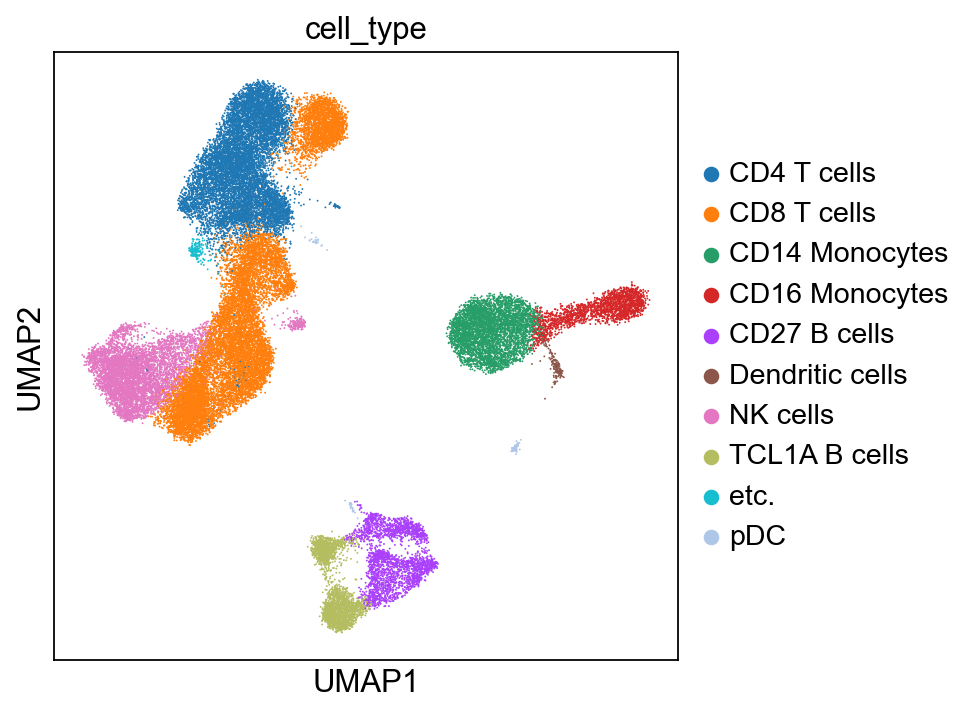

In [17]:
adata_concat.obs['cell_type'] = [annotation_dict[clust] for clust in adata_concat.obs['leiden_res2']]

sc.pl.umap(adata_concat, color = "cell_type")

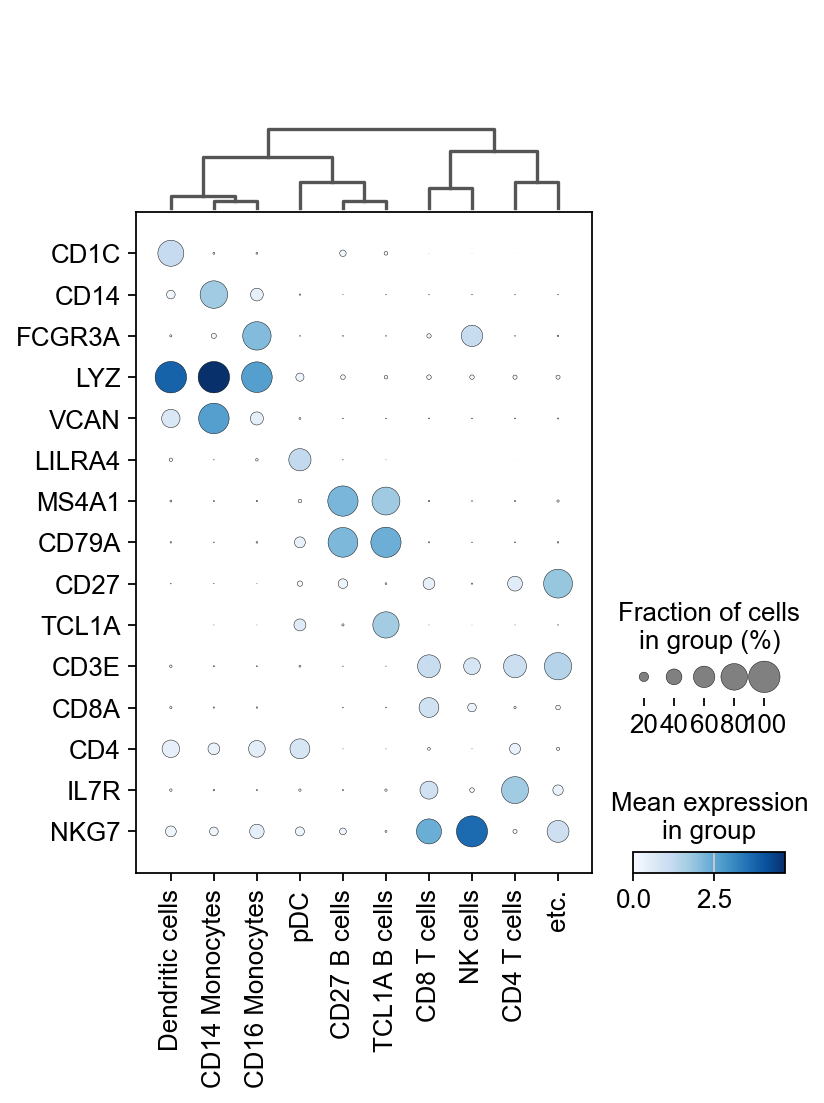

In [18]:
# dot plot
markers = ["CD1C", "CD14", "FCGR3A", "LYZ", "VCAN", "LILRA4", "MS4A1", "CD79A", "CD27", "TCL1A","CD3E" , "CD8A", "CD4", "IL7R","NKG7",  ]
sc.pl.dotplot(
    adata_concat,
    markers,
    dendrogram = True,
    groupby = "cell_type",
    swap_axes = True,
    cmap = "Blues"
    )

In [19]:
# batch 수정
batches = adata_concat.obs['batch']
batches = ["normal" if batch.startswith("normal") else "hiv" for batch in batches]

adata_concat.obs['condition'] = batches
adata_concat.obs

n_genes  n_genes_by_counts  \
AAACCTGAGAAACCGC-1-normal_1     1839               1838   
AAACCTGAGGACCACA-1-normal_1     1980               1978   
AAACCTGAGGATCGCA-1-normal_1     3024               3024   
AAACCTGAGGCACATG-1-normal_1     1764               1764   
AAACCTGAGGTGCACA-1-normal_1     2055               2055   
...                              ...                ...   
TTTGTCATCATGCTCC-1-hiv_3        1255               1255   
TTTGTCATCCAAATGC-1-hiv_3        1960               1959   
TTTGTCATCCAGGGCT-1-hiv_3        1115               1114   
TTTGTCATCGTACGGC-1-hiv_3        1321               1321   
TTTGTCATCTTAGCCC-1-hiv_3        1249               1248   

                             log1p_n_genes_by_counts  total_counts  \
AAACCTGAGAAACCGC-1-normal_1                 7.516977        6291.0   
AAACCTGAGGACCACA-1-normal_1                 7.590347        6907.0   
AAACCTGAGGATCGCA-1-normal_1                 8.014666        9196.0   
AAACCTGAGGCACATG-1-normal_1                 7.475906        6365.0   
AAACCTGAGGTGCACA-1-normal_1                 7.628518        6529.0   
...                                              ...           ...   
TTTGTCATCATGCTCC-1-hiv_3                    7.135687        2367.0   
TTTGTCATCCAAATGC-1-hiv_3                    7.580700        4776.0   
TTTGTCATCCAGGGCT-1-hiv_3                    7.016610        2084.0   
TTTGTCATCGTACGGC-1-hiv_3                    7.186901        2621.0   
TTTGTCATCTTAGCCC-1-hiv_3                    7.130099        2898.0   

                             log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGAAACCGC-1-normal_1            8.747034                   24.765538   
AAACCTGAGGACCACA-1-normal_1            8.840435                   25.727523   
AAACCTGAGGATCGCA-1-normal_1            9.126633                   16.746411   
AAACCTGAGGCACATG-1-normal_1            8.758727                   27.541241   
AAACCTGAGGTGCACA-1-normal_1            8.784163                   22.346454   
...                                         ...                         ...   
TTTGTCATCATGCTCC-1-hiv_3               7.769801                   21.419518   
TTTGTCATCCAAATGC-1-hiv_3               8.471568                   16.729481   
TTTGTCATCCAGGGCT-1-hiv_3               7.642524                   22.120921   
TTTGTCATCGTACGGC-1-hiv_3               7.871693                   19.954216   
TTTGTCATCTTAGCCC-1-hiv_3               7.972121                   20.082816   

                             total_counts_MT  log1p_total_counts_MT  \
AAACCTGAGAAACCGC-1-normal_1            117.0               4.770685   
AAACCTGAGGACCACA-1-normal_1            186.0               5.231109   
AAACCTGAGGATCGCA-1-normal_1            362.0               5.894403   
AAACCTGAGGCACATG-1-normal_1             96.0               4.574711   
AAACCTGAGGTGCACA-1-normal_1            211.0               5.356586   
...                                      ...                    ...   
TTTGTCATCATGCTCC-1-hiv_3                53.0               3.988984   
TTTGTCATCCAAATGC-1-hiv_3               144.0               4.976734   
TTTGTCATCCAGGGCT-1-hiv_3                46.0               3.850147   
TTTGTCATCGTACGGC-1-hiv_3                75.0               4.330733   
TTTGTCATCTTAGCCC-1-hiv_3                69.0               4.248495   

                             pct_counts_MT  total_counts_ribo  ...  outlier  \
AAACCTGAGAAACCGC-1-normal_1       1.859800             2799.0  ...    False   
AAACCTGAGGACCACA-1-normal_1       2.692920             3114.0  ...    False   
AAACCTGAGGATCGCA-1-normal_1       3.936494             1643.0  ...    False   
AAACCTGAGGCACATG-1-normal_1       1.508248             2874.0  ...    False   
AAACCTGAGGTGCACA-1-normal_1       3.231735             2472.0  ...    False   
...                                    ...                ...  ...      ...   
TTTGTCATCATGCTCC-1-hiv_3          2.239121              405.0  ...    False   
TTTGTCATCCAAATGC-1-hiv_3          3.015075   

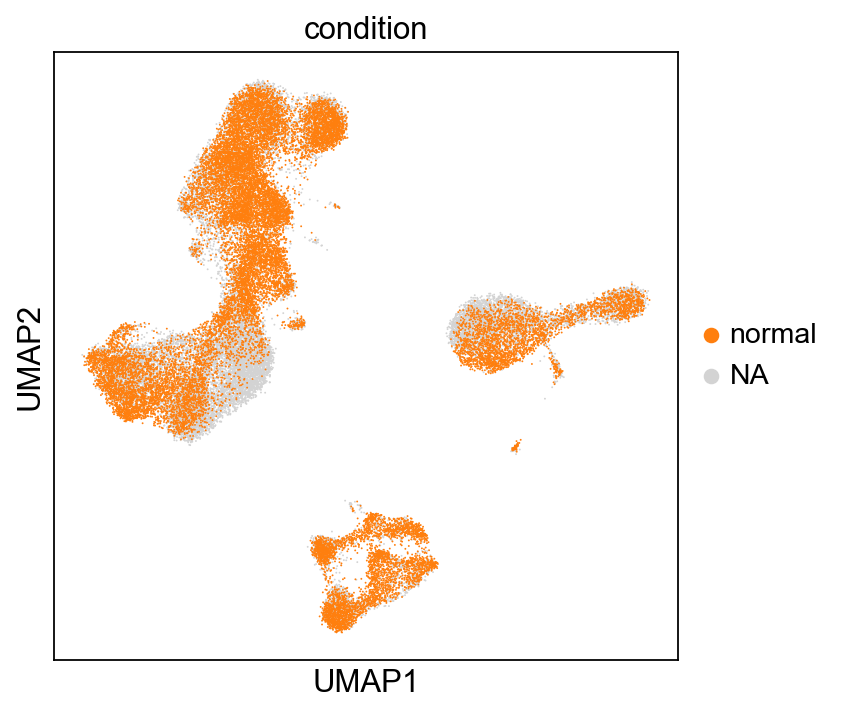

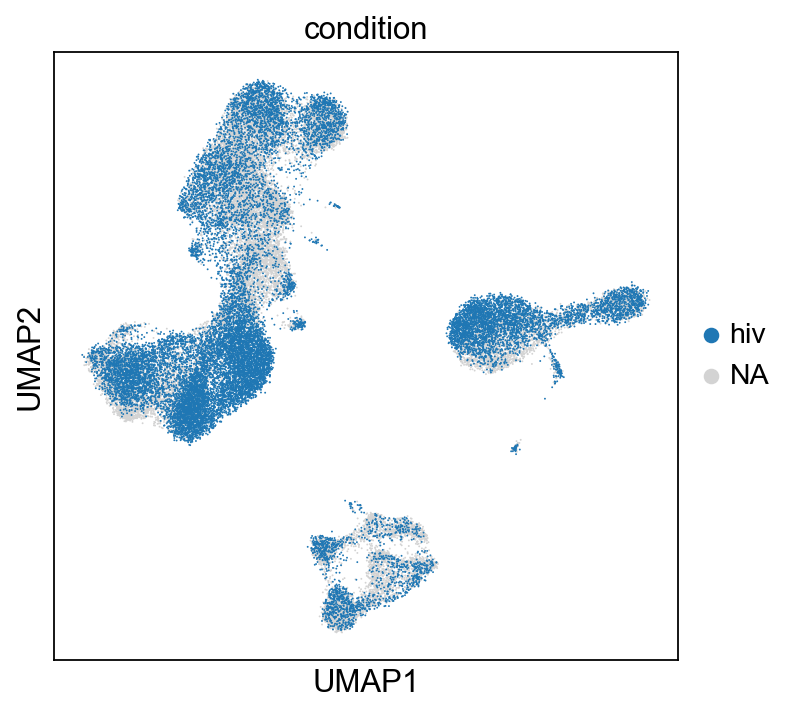

In [20]:

sc.pl.umap(
    adata_concat,
    color = ["condition"],
    groups = ["normal"]
    )

sc.pl.umap(
    adata_concat,
    color = ["condition"],
    groups = ["hiv"]
    )

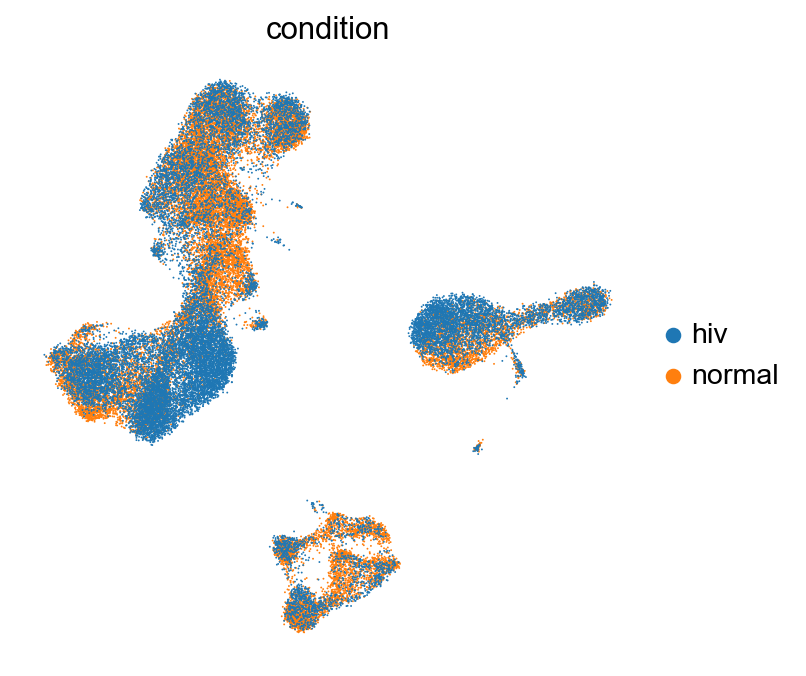

In [22]:
sc.pl.umap(
    adata_concat,
    color=["condition"],
    palette = sc.pl.palettes.vega_20_scanpy,
    frameon = False
    
)

In [29]:
cell_counts

cell_type  CD4 T cells  CD8 T cells  CD14 Monocytes  CD16 Monocytes  \
condition                                                             
hiv               3373         8076            2613            1075   
normal            6920         6004            1731             914   

cell_type  CD27 B cells  Dendritic cells  NK cells  TCL1A B cells  etc.  pDC  
condition                                                                     
hiv                 633               99      2722            833   115   64  
normal             1924               75      2933           1609    52   63

C:\Users\heung\AppData\Local\Temp\ipykernel_61288\1936569140.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = adata_concat.obs.groupby(['condition', 'cell_type']).size().unstack(fill_value=0)


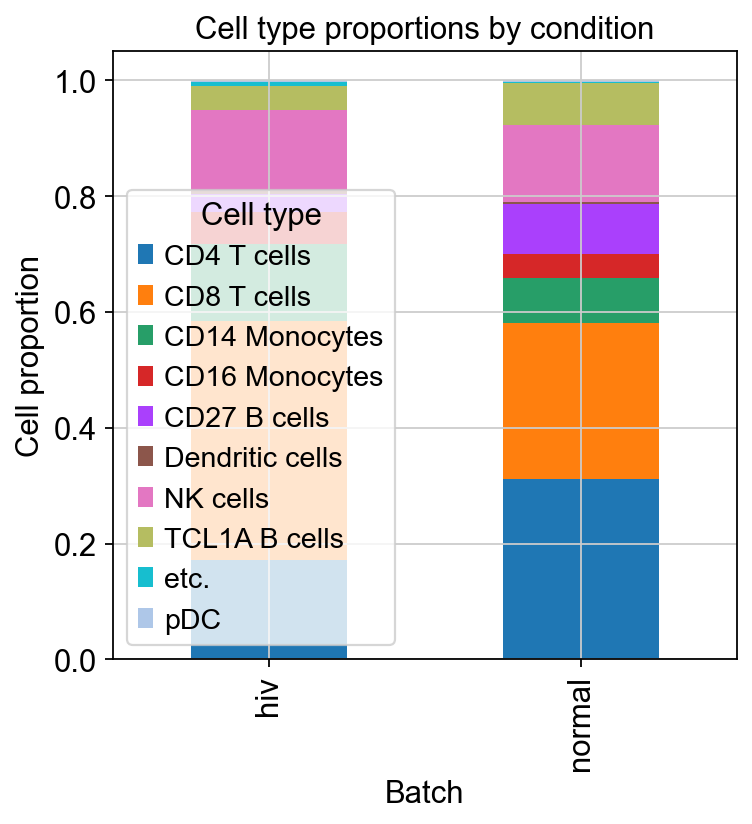

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 각 batch와 cell_type에 따른 cell 수 계산
cell_counts = adata_concat.obs.groupby(['condition', 'cell_type']).size().unstack(fill_value=0)

# 각 condition 내에서의 cell_type 비율 계산
cell_proportions = cell_counts.div(cell_counts.sum(axis=1), axis=0)

# 데이터프레임으로 변환하여 시각화
cell_proportions.plot(kind='bar', stacked=True)
plt.xlabel('Batch')
plt.ylabel('Cell proportion')
plt.title('Cell type proportions by condition')
plt.legend(title='Cell type')
plt.show()


C:\Users\heung\AppData\Local\Temp\ipykernel_53288\3599152228.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = adata_concat.obs.groupby(['condition', 'cell_type']).size().unstack(fill_value=0)


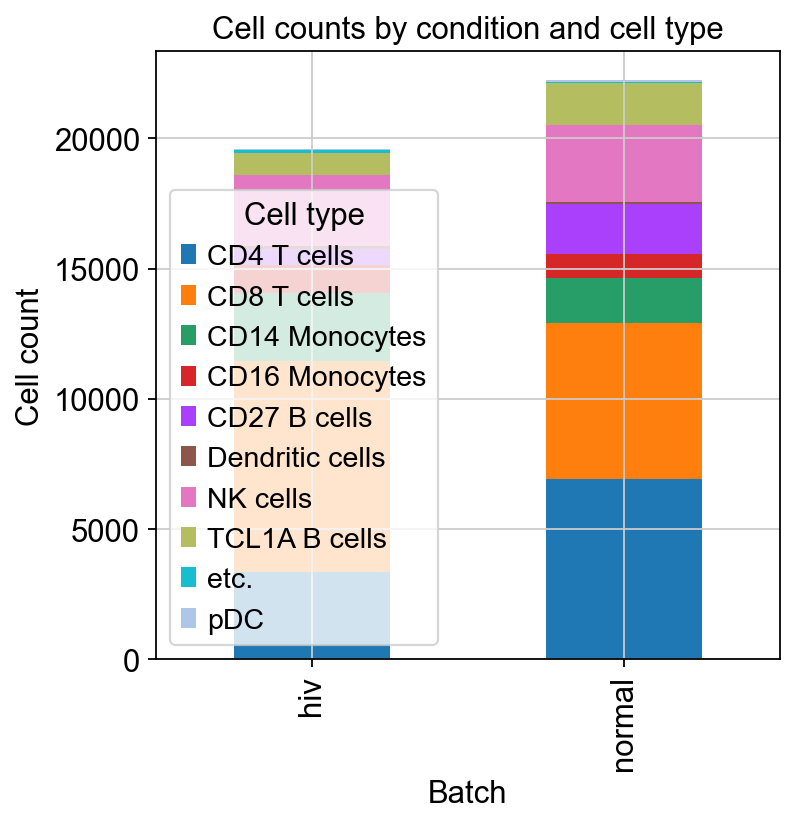

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 condition와 cell_type에 따른 cell 수 계산
cell_counts = adata_concat.obs.groupby(['condition', 'cell_type']).size().unstack(fill_value=0)

# 데이터프레임으로 변환하여 시각화
cell_counts.plot(kind='bar', stacked=True)
plt.xlabel('Batch')
plt.ylabel('Cell count')
plt.title('Cell counts by condition and cell type')
plt.legend(title='Cell type')
plt.show()


C:\Users\heung\AppData\Local\Temp\ipykernel_53288\572595396.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_counts = adata_concat.obs.groupby(['cell_type', 'condition']).size().unstack(fill_value=0)


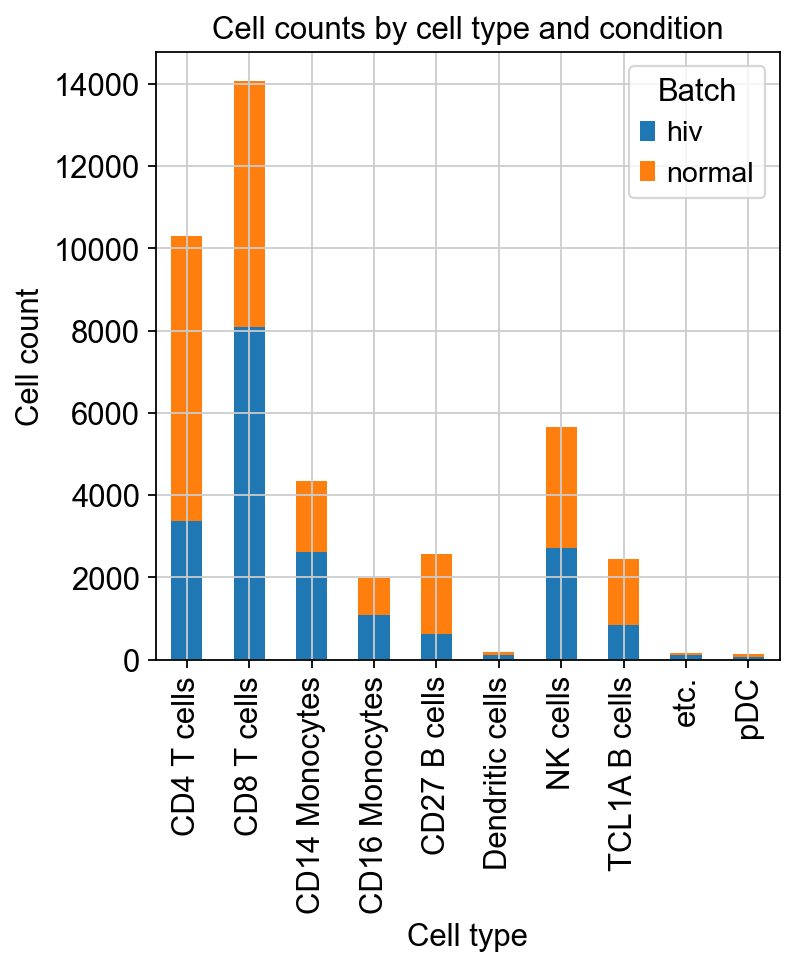

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 batch에 대해 cell type별로 cell 수 계산
cell_counts = adata_concat.obs.groupby(['cell_type', 'condition']).size().unstack(fill_value=0)

# 데이터프레임으로 변환하여 시각화
cell_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cell type')
plt.ylabel('Cell count')
plt.title('Cell counts by cell type and condition')
plt.legend(title='Batch')
plt.show()


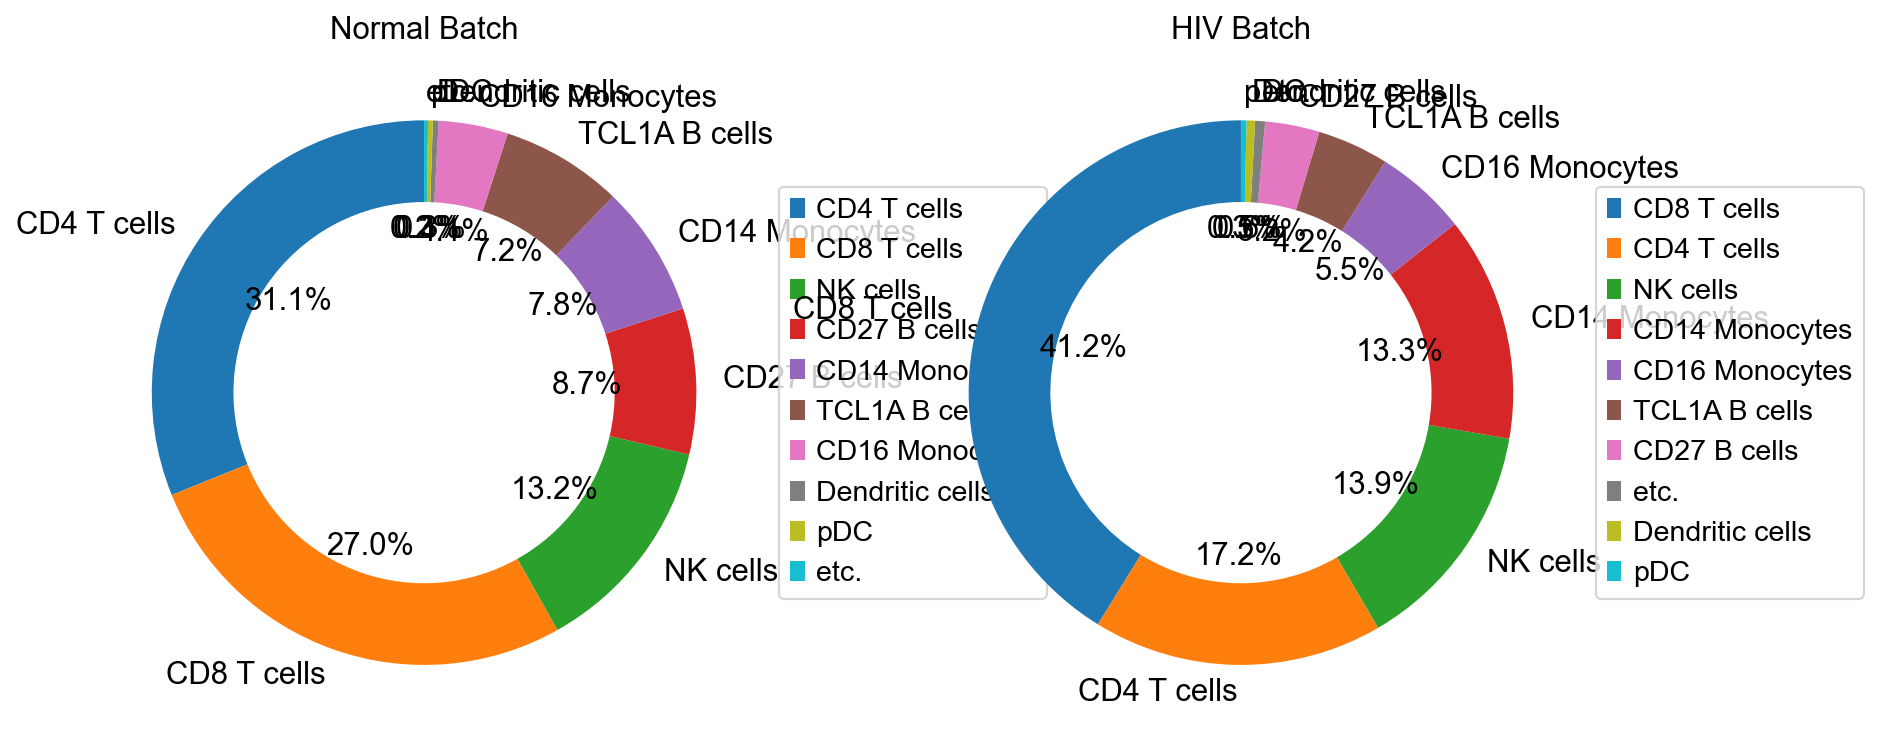

In [27]:
import matplotlib.pyplot as plt

# 각 배치별로 cell type의 비율 계산
batch_normal = adata_concat[adata_concat.obs['condition'] == 'normal']
batch_hiv = adata_concat[adata_concat.obs['condition'] == 'hiv']

normal_cell_counts = batch_normal.obs['cell_type'].value_counts()
hiv_cell_counts = batch_hiv.obs['cell_type'].value_counts()

# 도넛 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# normal batch의 도넛 그래프
normal_pie = axs[0].pie(normal_cell_counts, labels=normal_cell_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors, wedgeprops=dict(width=0.3), )
axs[0].set_title('Normal Batch')
axs[0].legend(normal_cell_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# hiv batch의 도넛 그래프
hiv_pie = axs[1].pie(hiv_cell_counts, labels=hiv_cell_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors, wedgeprops=dict(width=0.3))
axs[1].set_title('HIV Batch')
axs[1].legend(hiv_cell_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()



In [29]:
adata_concat.write("adata_concat.h5ad")

In [ ]:
import scanpy as sc
adata = sc.read_h5ad("adata_concat.h5ad")

adata.to_df().to_csv("adata_concat.csv", index = False)